# Grid Environment Experiments

In [1]:
from neuronav.envs.grid_env import GridEnv, GridSize, GridObsType
from neuronav.agents.td_agents import TDSR, TDQ
from neuronav.agents.dyna_agents import DynaQ, DynaSR
from neuronav.agents.mb_agents import MBV
from neuronav.envs.grid_topographies import GridTopography
from neuronav.utils import run_episode
from helpers import plot_grid_experiment_results

/Users/awjuliani/miniconda3/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


### Reward Transfer

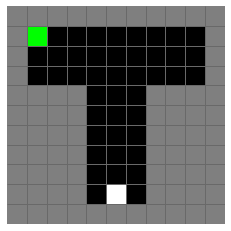

In [2]:
num_eps = 150
max_steps = 100
num_reps = 5

agent_types = [TDQ, TDSR, DynaSR, MBV]

env = GridEnv(topography=GridTopography.t_maze, grid_size=GridSize.small, obs_type=GridObsType.index)
env.reset()    
grid = env.render()
results = {}

for h in range(num_reps):
    for agent_type in agent_types:
        agent = agent_type(env.state_size, env.action_space.n, lr=1e-1, poltype="eg", epsilon=0.1)
        tot_steps = []
        for i in range(num_eps):
            if i > num_eps // 2:
                use_goal = [1, env.grid_size-2]
            else:
                use_goal = [1, 1]
            agent, steps = run_episode(env, agent, max_steps, goal_pos=use_goal)
            tot_steps.append(steps)
        if str(agent_type.__name__) in results.keys():
            results[str(agent_type.__name__)].append(tot_steps)
        else:
            results[str(agent_type.__name__)] = [tot_steps]

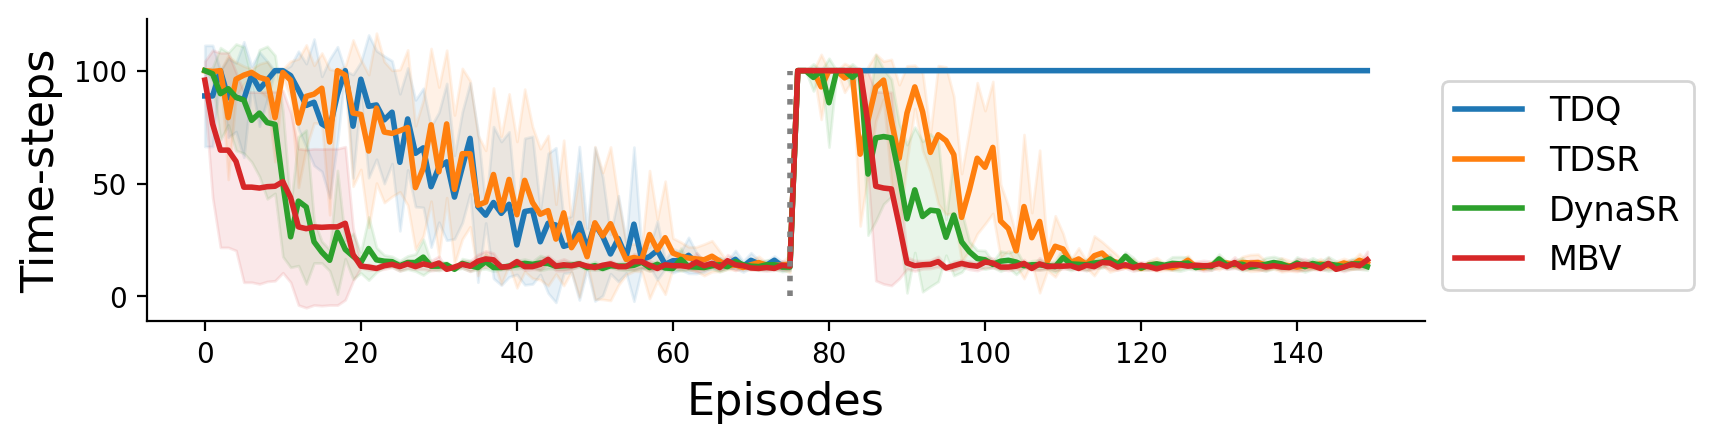

In [3]:
plot_grid_experiment_results(results, num_eps)

### Structure Transfer

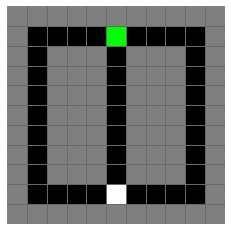

In [4]:
num_eps = 100
max_steps = 100
num_reps = 5

agent_types = [TDQ, DynaQ, DynaSR, MBV]

env = GridEnv(topography=GridTopography.detour, grid_size=GridSize.small, obs_type=GridObsType.index)
env.reset()
grid = env.render()

results = {}

for h in range(num_reps):
    for agent_type in agent_types:
        agent = agent_type(env.state_size, env.action_space.n, lr=1e-1, poltype="eg", epsilon=0.1)
        tot_steps = []
        env = GridEnv(topography=GridTopography.detour, grid_size=GridSize.small, obs_type=GridObsType.index)
        for i in range(num_eps):
            if i > num_eps // 2:
                env = GridEnv(topography=GridTopography.detour_block, grid_size=GridSize.small, obs_type=GridObsType.index)
            agent, steps = run_episode(env, agent, max_steps)
            tot_steps.append(steps)
        if str(agent_type.__name__) in results.keys():
            results[str(agent_type.__name__)].append(tot_steps)
        else:
            results[str(agent_type.__name__)] = [tot_steps]

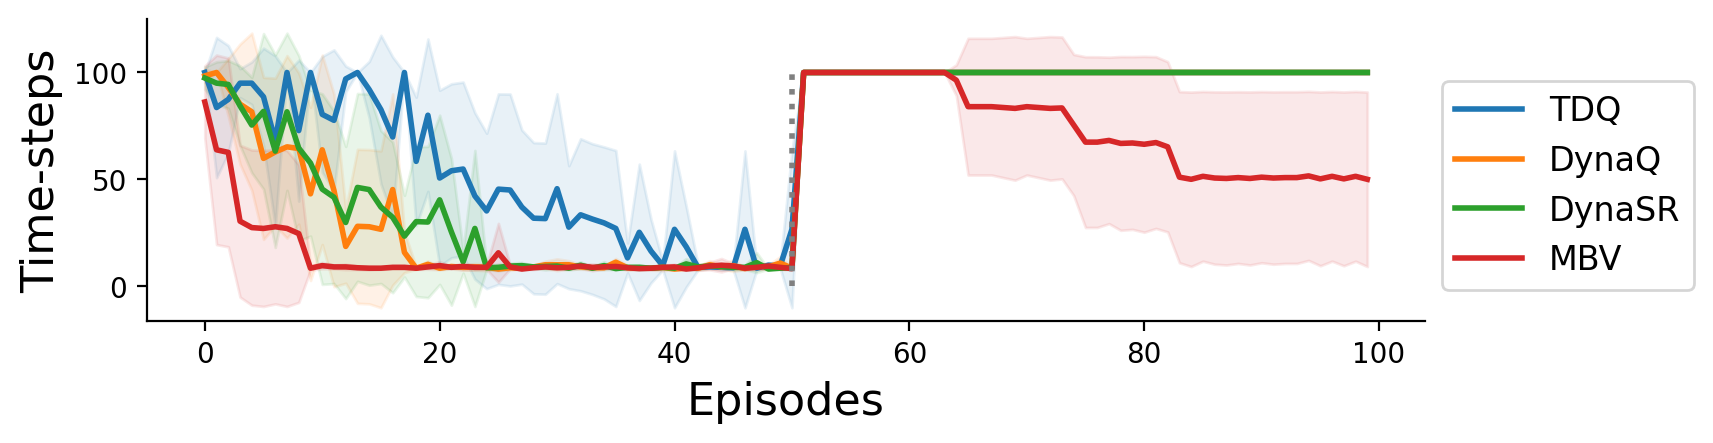

In [5]:
plot_grid_experiment_results(results, num_eps)